# **Predicting Heart Disease using Machine Learning**

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import RocCurveDisplay, roc_curve, auc
from sklearn.inspection import permutation_importance


import time
print(f'Last updated {time.asctime()}')

Last updated Mon Jul 15 23:53:58 2024


## Loading and Understanding the Data

In [3]:
# Load the data
df = pd.read_csv('heart-disease.csv')
df.shape

(303, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Concise summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# Descriptive statistics of numerical columns
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## EDA

In [8]:
# Let's see how many positive (1) and negative (0) samples we have in our dataframe
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

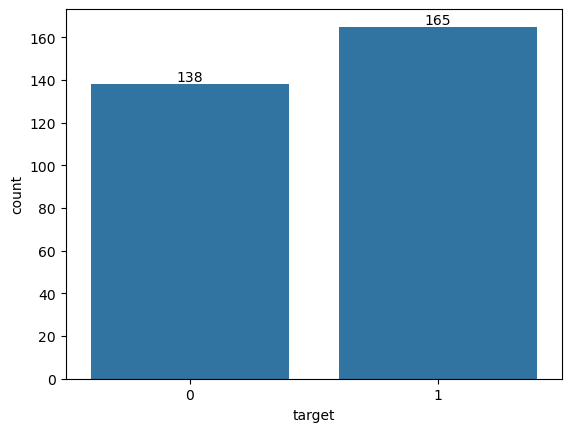

In [9]:
# Plot the value counts with a bar graph
ax = sns.countplot(x='target', data=df)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')
plt.show()

### Heart Disease Frequency According to Gender

In [10]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
# Compare target column with sex column
crosstab = pd.crosstab(df.target, df.sex)
crosstab	

sex,0,1
target,,
0,24,114
1,72,93


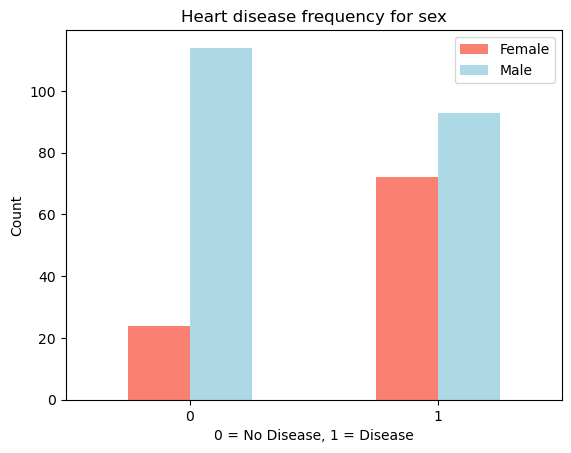

In [12]:
# Making our crosstad visual
crosstab.plot(kind='bar', color=['salmon', 'lightblue'])
plt.title('Heart disease frequency for sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Count')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0);

### Age VS Max Heart Rate for Heart Disease

In [13]:
unique_thalach = df['thalach'].value_counts()
unique_thalach = pd.DataFrame(unique_thalach)

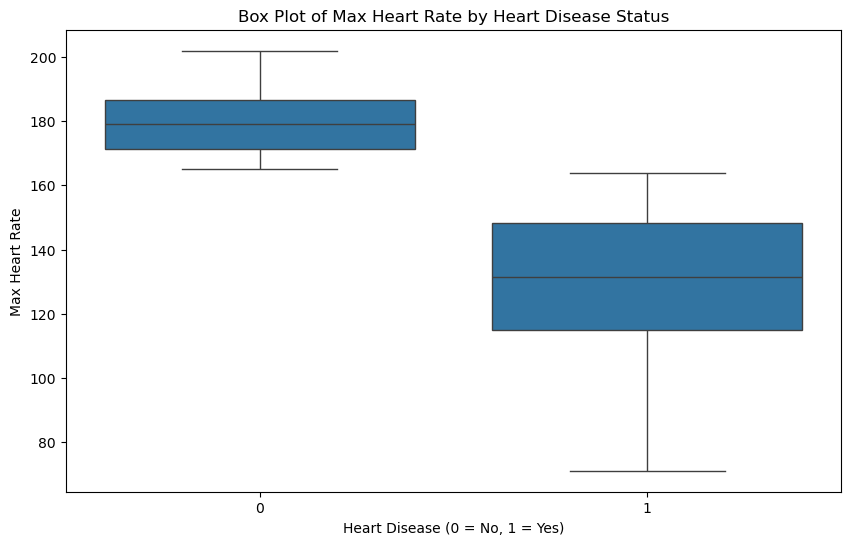

In [14]:
# Distribution of max heart rate across the two groups in the target
plt.figure(figsize=(10, 6))
sns.boxplot(data=unique_thalach, x=df['target'], y='thalach')
plt.title('Box Plot of Max Heart Rate by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Max Heart Rate')
plt.show()

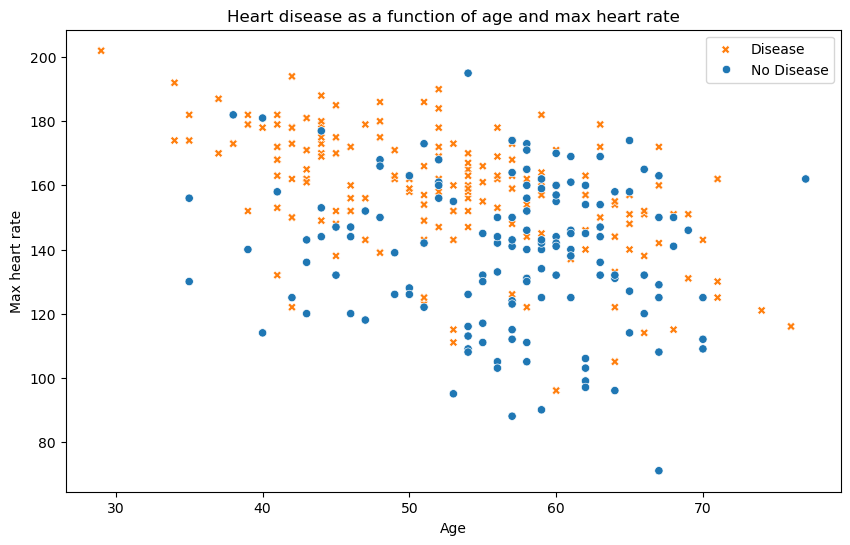

In [15]:
# Making a scatterplot for age and thalach (there are so many different values for both of them)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='thalach', hue='target', style='target')
plt.title('Heart disease as a function of age and max heart rate')
plt.xlabel('Age')
plt.ylabel('Max heart rate')
plt.legend(['Disease', 'No Disease']);

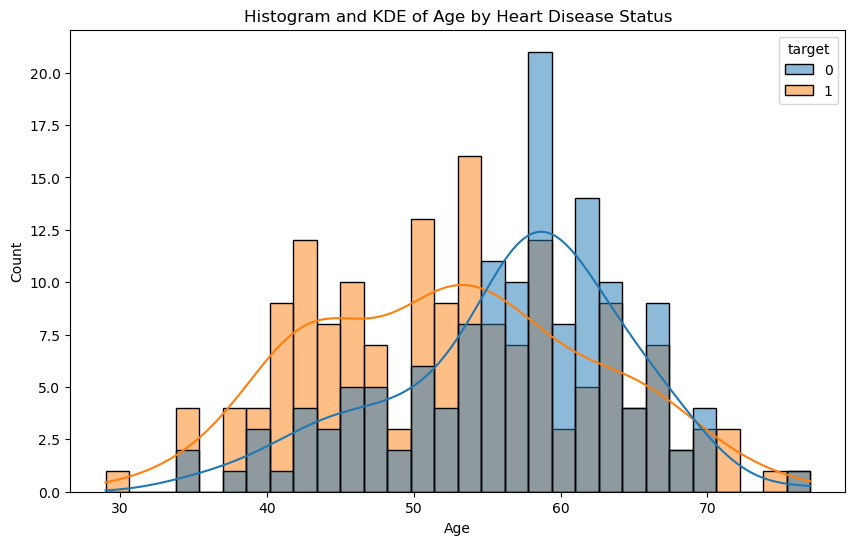

In [16]:
# Looking at how age is distributed
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='target', kde=True, bins=30)
plt.title('Histogram and KDE of Age by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Heart Disease Frequency per Chest Pain Type

In [17]:
# Compare target column with chest pain column
crosstab = pd.crosstab(df.cp, df.target)
crosstab

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


<Figure size 1000x600 with 0 Axes>

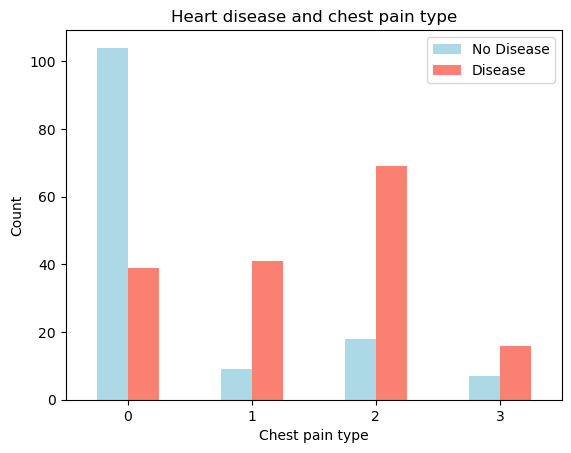

In [18]:
# Bar plot to visualize the relationship between chest pain type and target
plt.figure(figsize=(10, 6))
crosstab.plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Heart disease and chest pain type')
plt.xlabel('Chest pain type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['No Disease', 'Disease']);

### Scaling the DataFrame

In [19]:
# Scaling the datafram using StandardScaler
scaler = StandardScaler()
features = df.drop('target', axis=1)
features_scaled = scaler.fit_transform(features)
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)
df_scaled['target'] = df['target'] 

### Correlation Matrix

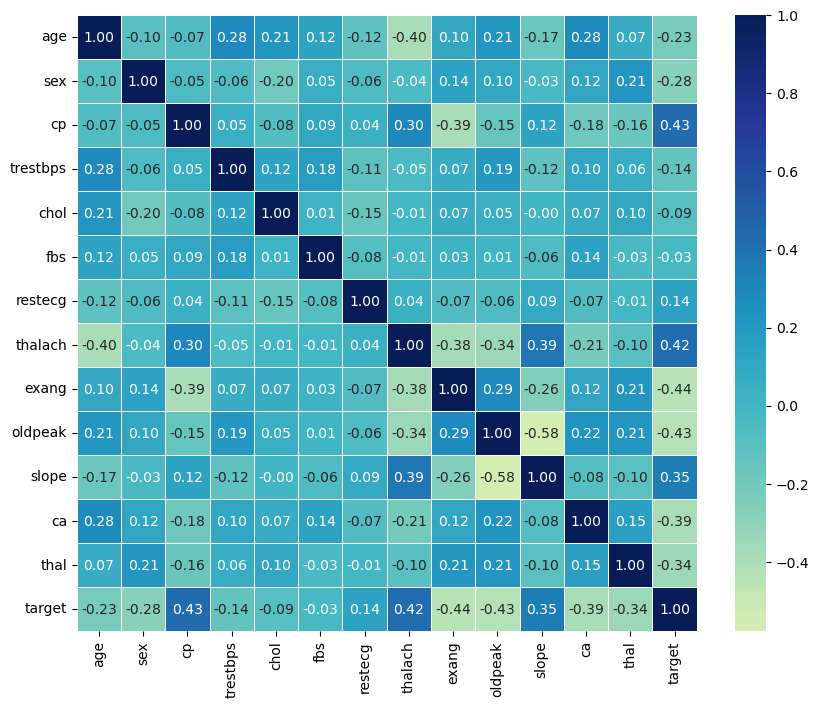

In [20]:
# Find the correlation between our independent variables
corr = df_scaled.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, center=0, linewidths=0.5, fmt='.2f', cmap='YlGnBu');

In [21]:
# Print variable pair with high coefficient of correlation 
high_corr_pairs = []
for col1 in corr.columns:
    for col2 in corr.columns:
        if corr.loc[col1][col2] > 0.7 and col1 != col2:
            high_corr_pairs.append((col1, col2))

for pair in high_corr_pairs:
    print(pair[0], " ", pair[1])

## Modelling

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
# Splitting the data into training and test datasets
X = df_scaled.drop('target', axis=1)
y = df_scaled['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

Model : <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Test Accuracy:   91.80%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61

             Confusion_matrix 


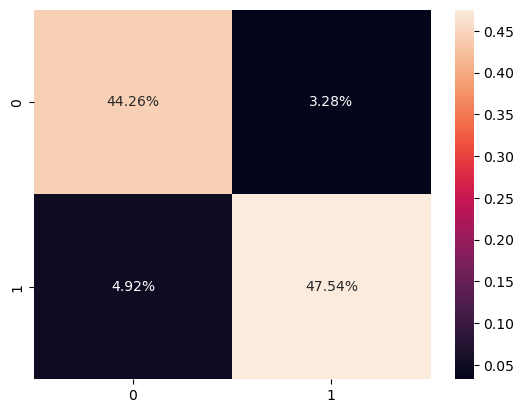

_______________________________________________
Model : <class 'sklearn.linear_model._logistic.LogisticRegression'>
Test Accuracy:   85.25%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

             Confusion_matrix 


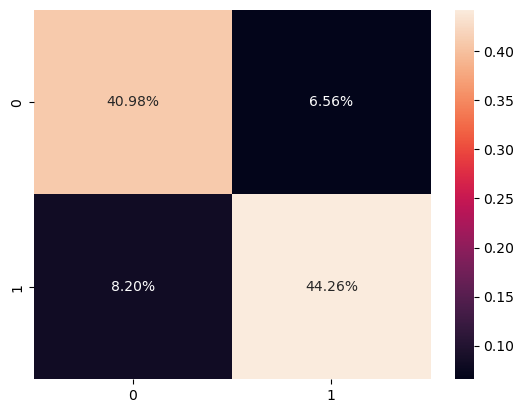

_______________________________________________
Model : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Test Accuracy:   86.89%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

             Confusion_matrix 


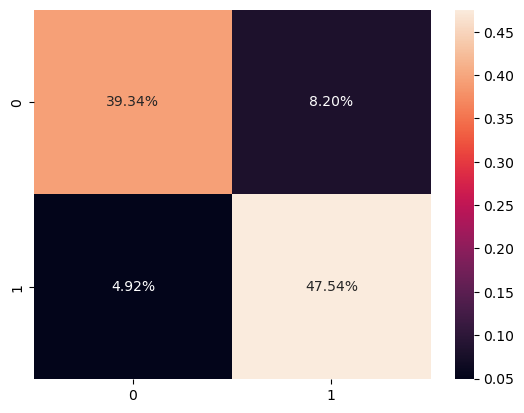

_______________________________________________


In [24]:
#  Comparing the accuracy scores, classification reports, and confusion matrices of different classification models
models = [KNeighborsClassifier, LogisticRegression, RandomForestClassifier]
accuracy_test = []
for m in models:
    print(f"Model : \033[1m{m}\033[0m")
    model = m()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = model.score(X_test, y_test)
    accuracy_test.append(acc)
    print("Test Accuracy: \033[32m \033[01m {:.2f}% \033[30m \033[0m".format(acc*100))
    print('\033[01m              Classification_report \033[0m')
    print(classification_report(y_test, y_pred))
    print('\033[01m             Confusion_matrix \033[0m')
    cf_matrix = confusion_matrix(y_test, y_pred)
    plot_ = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='0.2%')
    plt.show()
    print('\033[31m_______________________________________________\033[0m')

In [25]:
# Save our model scores to a dictionary
output = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Random Forest'],
    'Accuracy': accuracy_test
})
output

,Model,Accuracy
0,KNN,0.918033
1,Logistic Regression,0.852459
2,Random Forest,0.868852


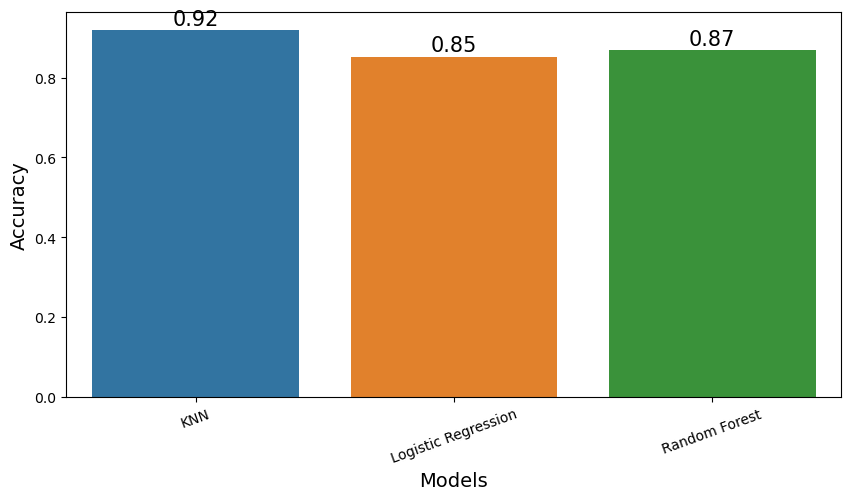

In [26]:
# Visualizing the accuracy scores of different models
plt.figure(figsize=(10, 5))
plots = sns.barplot(x='Model', y='Accuracy', data=output, hue='Model')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), (bar.get_x() + bar.get_width()/2, bar.get_height()), ha='center', va='center', size=15,
                   xytext=(0, 8), textcoords='offset points')

plt.xlabel("Models", size=14)
plt.xticks(rotation=20)
plt.ylabel("Accuracy", size=14)
plt.show()

## HyperParameter Tuning

Now let's try to improve our models a little further. We are looking for the goldilocks model. One which does well on our dataset but also does well on unseen examples. To test different hyper-parameters, you could use a validation set but since we don't have much data we will use cross validation.

### Tuning KNeighborsClassifier (KNN)

In [27]:
# Iteratively evaluating the model with different values for the "n_neighbors" parameter
train_scores = []
test_scores = []
knn = KNeighborsClassifier()
for i in range(1, 21):
    knn.set_params(n_neighbors = i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

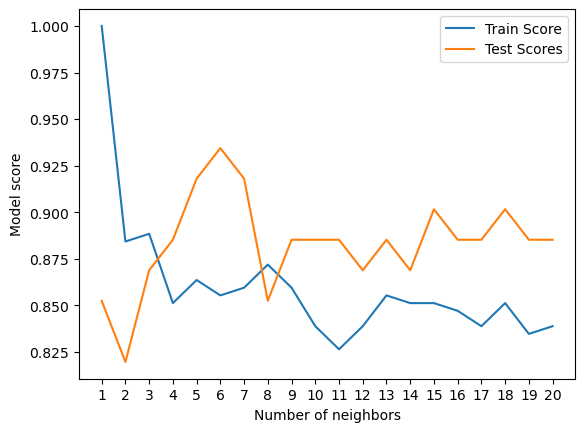

In [28]:
# Visualize training and test scores for different values of "n_neighbors"
neighbors = range(1, 21)
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label='Test Scores')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

In [29]:
# Using GridSearchCV to find the best knn classifier
knn_grid = {
    'n_neighbors': [5,6,7,8,9,10],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan'] 
}
gs = GridSearchCV(KNeighborsClassifier(), param_grid=knn_grid, cv=3, verbose=3, n_jobs=-1)
knn_gs = gs.fit(X_train, y_train)
print("Best Parameters: ", knn_gs.best_params_)
print("Best Score: ", knn_gs.best_score_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters:  {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Best Score:  0.81820987654321


### Tuning LogisticRegression and RandomForestClassifier

In [30]:
# Defining the parameter grid for logistic regression and random forest classifier
lr_grid = {
    'solver': ['liblinear'],
    'max_iter': np.arange(50, 500, 50),
    'C': np.logspace(-4, 4, 30),
    'penalty': ['l1', 'l2']
}

rf_grid = {
    'n_estimators': np.arange(10, 100, 50),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2)
}

In [31]:
# Using RandomizedSearchCV to find the best logistic regression model
rs_lr = RandomizedSearchCV(LogisticRegression(), param_distributions=lr_grid, cv=10, n_iter=20, verbose=True, n_jobs=-1)
rs_lr.fit(X_train, y_train)
print("Best Parameters: ", rs_lr.best_params_)
print("Best Score: ", rs_lr.best_score_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best Parameters:  {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 300, 'C': 1487.3521072935118}
Best Score:  0.8145


In [32]:
# Using RandomizedSearchCV to find the best random forest model
rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv=10, n_iter=20, verbose=True, n_jobs=-1)
rs_rf.fit(X_train, y_train)
print("Best Parameters: ", rs_rf.best_params_)
print("Best Score: ", rs_rf.best_score_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best Parameters:  {'n_estimators': 10, 'min_samples_split': 12, 'min_samples_leaf': 11, 'max_depth': 20}
Best Score:  0.8468333333333333


In [33]:
# Using GridSearchCV to find the best logistic regression model
gs_lr = GridSearchCV(LogisticRegression(), param_grid=lr_grid, cv=5, n_jobs=-1, scoring='accuracy')
gs_lr.fit(X_train, y_train)
print("Best Parameters: ", gs_lr.best_params_)
print("Best Score: ", gs_lr.best_score_)

Best Parameters:  {'C': 1.3738237958832638, 'max_iter': 50, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score:  0.8221088435374149


In [34]:
# Using GridSearchCV to find the best random forest model
gs_rf = GridSearchCV(RandomForestClassifier(), param_grid=rf_grid, cv=5, n_jobs=-1, scoring='accuracy')
gs_rf.fit(X_train, y_train)
print("Best Parameters: ", gs_rf.best_params_)
print("Best Score: ", gs_rf.best_score_)

Best Parameters:  {'max_depth': None, 'min_samples_leaf': 13, 'min_samples_split': 8, 'n_estimators': 10}
Best Score:  0.8471088435374149


## Finalizing the Solution

Upon exhaustive hyperparameter tuning, the foundational K-Nearest Neighbors model demonstrated superior performance, achieving an impressive 92% accuracy. Consequently, we will deploy this optimized KNN model as our final predictive solution.

In [35]:
final_model = KNeighborsClassifier()
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9180327868852459

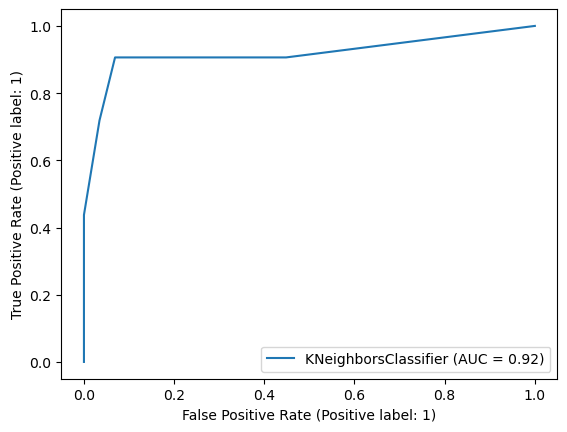

In [36]:
# Directly plot the ROC curve for the final model using the test data
RocCurveDisplay.from_estimator(estimator=final_model, X=X_test, y=y_test)

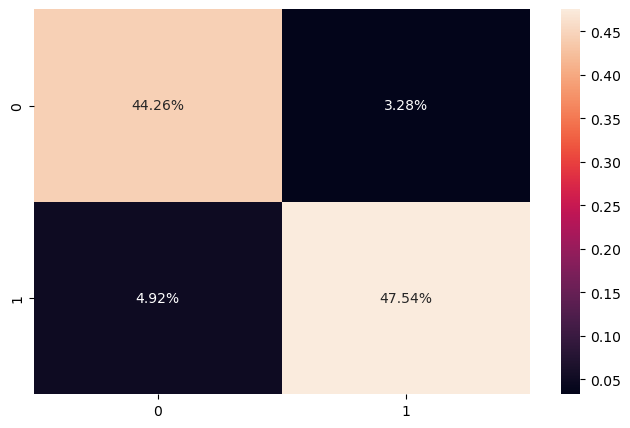

In [37]:
# Confusion matrix for the final model
plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred)/np.sum(confusion_matrix(y_test, y_pred)), annot=True, fmt='.2%')
plt.show()

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



In [39]:
# Evaluation our final model on different metrics
cv_accuracy = cross_val_score(final_model, X, y, cv=5, scoring='accuracy').mean()
cv_recall = cross_val_score(final_model, X, y, cv=5, scoring='recall').mean()
cv_precision = cross_val_score(final_model, X, y, cv=5, scoring='precision').mean()
cv_f1 = cross_val_score(final_model, X, y, cv=5, scoring='f1').mean()
print(cv_accuracy, cv_recall, cv_precision, cv_f1)

0.8118579234972678 0.8727272727272727 0.8052474640110713 0.835485198283644


<Axes: >

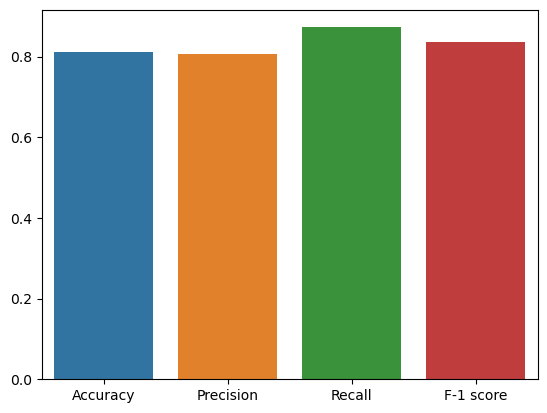

In [40]:
# Saving the evaluation metrics in a dataframe and visualizing it using a bar graph
cv_metrics = pd.DataFrame({
    'Accuracy': cv_accuracy,
    'Precision': cv_precision,
    'Recall': cv_recall,
    'F-1 score':cv_f1,
}, index=[0])
sns.barplot(data=cv_metrics)

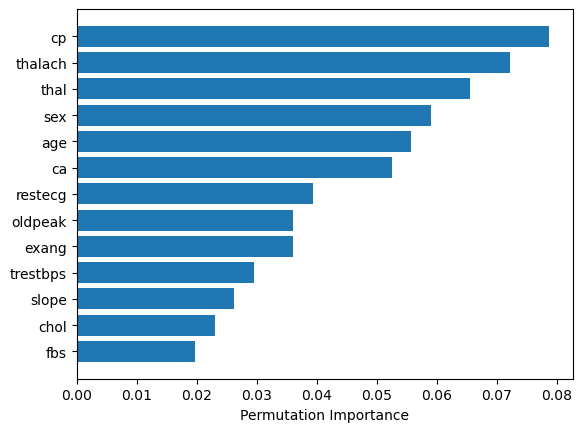

In [41]:
# Calculate permutation importance
perm_importance = permutation_importance(final_model, X_test, y_test)

# Get feature importances
importances = perm_importance.importances_mean
sorted_idx = importances.argsort()

plt.barh(X.columns[sorted_idx], importances[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()